## User Loyalty Analysis

##### EDA, metrics and distribution analysis

We have an e-commerce retail store dataset. Let's explore user's behaviour.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('#####\lesson_3_data__1_.csv', encoding='windows-1251')

In [3]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [4]:
# Выделим user id и покупки в отдельную таблицу
user_df = df[['tc', 'art_sp']]

In [5]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [6]:
user_df = user_df.rename(columns = {'tc':'user_id', 'art_sp':'brand_info'})

In [7]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [8]:
# Выделим название бренда в отдельный столбец

In [9]:
# МЕТОД apply - для применения функции ко всему столбцу сразу

In [10]:
def split_brand_name(brand_name_data):
    return brand_name_data.split()[-1]

In [11]:
split_brand_name('MARAVILLA 500 G Store_Brand')

'Store_Brand'

In [12]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand_name)

In [13]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [14]:
# lambda функция вместо простых def функций

In [15]:
user_df['brand_name_lambda'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])

In [16]:
user_df.head()

,user_id,brand_info,brand_name,brand_name_lambda
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2,Brand_2


In [17]:
user_df = user_df.drop('brand_name_lambda', axis=1)

In [18]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


### Найдем лояльных к определенному бренду пользователей 

In [19]:
# И предложим им какой-нибудь бонус. Т.е. если человек совершил, например, 10 покупок этого бренда.

##### Описательный анализ

In [20]:
# Сколько совершенных покупок делают покупателя лояльным кокретному бренду. Выберем 75%, равный 5.

In [21]:
user_purchases = (user_df
                  .groupby('user_id', as_index=False)
                  .agg({'brand_name':'count'})
                  .rename(columns={'brand_name':'purchases'})
                  .query('purchases >= 5')
                 )

In [22]:
user_purchases.head()

,user_id,purchases
1,1031,6
2,4241,5
11,25971,7
14,40911,27
16,45181,5


In [23]:
user_purchases.describe()

,user_id,purchases
count,3.383000e+03,3383.000000
mean,6.421500e+07,9.320130
std,1.504830e+08,5.623993
min,1.031000e+03,5.000000
25%,8.871271e+06,6.000000
50%,2.842547e+07,7.000000
75%,8.542964e+07,11.000000
max,1.408810e+09,60.000000


In [24]:
# Сколько покупок любимого бренда совершил пользователь

In [25]:
favorite_brand_purchases_df = (
user_df \
        .groupby(['user_id', 'brand_name'], as_index=False) \
        .agg({'brand_info':'count'}) \
        .rename(columns={'brand_info':'count'}) \
        .sort_values(['user_id', 'count'], ascending=[True, False]) \
        .groupby('user_id') \
        .head(1) \
        .rename(columns={'brand_name':'favorite_brand', 'count':'favorite_brand_purchases'})
)

In [26]:
favorite_brand_purchases_df

,user_id,favorite_brand,favorite_brand_purchases
0,-1236394515,Brand_4,1
2,1031,Store_Brand,5
3,4241,Brand_4,3
5,17311,Brand_4,2
6,17312,Brand_1,1
...,...,...,...
18183,1408817589,Store_Brand,2
18184,1408825059,Brand_1,1
18185,1408832719,Brand_4,3
18186,1408840919,Store_Brand,1


In [27]:
# Сколько уникальных брендов купил пользователь

In [28]:
user_unique_brands = (
                    user_df.groupby('user_id', as_index=False)
                    .agg({'brand_name':pd.Series.nunique})
                    .rename(columns={'brand_name':'unique_brands_num'})
                      )

In [29]:
user_unique_brands

,user_id,unique_brands_num
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [30]:
# Объединение нескольких таблиц

In [31]:
loyalty_df = user_purchases \
        .merge(user_unique_brands, on='user_id') \
        .merge(favorite_brand_purchases_df, on='user_id')

In [32]:
loyalty_df.head()

,user_id,purchases,unique_brands_num,favorite_brand,favorite_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [33]:
# Мы можем отнести к лояльным пользователям тех, у кого только один уникальный бренд в результрующей таблице 
# (т.е. они совершили более 5-ти покупок одного бренда).

In [34]:
loyal_users = loyalty_df[loyalty_df.unique_brands_num == 1]

In [35]:
loyal_users

,user_id,purchases,unique_brands_num,favorite_brand,favorite_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [36]:
loyalty_df['loyalty_score'] = loyalty_df['favorite_brand_purchases'] / loyalty_df['purchases']

In [37]:
# loyalty_df = loyalty_df.drop('loyalty', axis=1)

In [38]:
loyalty_df.head()

,user_id,purchases,unique_brands_num,favorite_brand,favorite_brand_purchases,loyalty_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


##### Визуализация

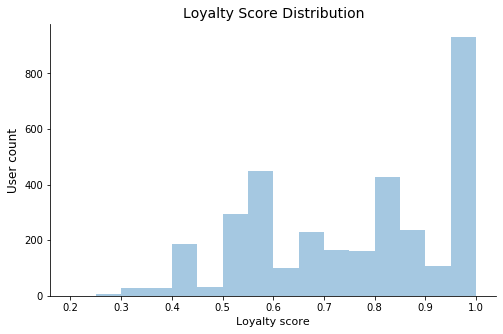

In [39]:
plt.figure(figsize=(8, 5))
ax = sns.distplot(loyalty_df.loyalty_score, kde=False)
plt.title('Loyalty Score Distribution', fontsize=14)
plt.xlabel('Loyalty score', fontsize=11)
plt.ylabel('User count', fontsize=12)
sns.despine()

In [40]:
# Мы видим, что большинство пользователей лояльны какому-то одному продукту.
# Мы могли бы предлагать скидку пользователям с показателем лояльности, превышающим определенный порог (в зависимости от размера скидки).

##### Лояльность по брендам

In [41]:
brands_loyalty = (
        loyalty_df.groupby('favorite_brand', as_index=False)
        .agg({'loyalty_score':'median', 'user_id':'count'})
        .sort_values('loyalty_score', ascending=False)
        .rename(columns={'loyalty_score':'median_loyalty', 'user_id':'user_count'})
        )
brands_loyalty

,favorite_brand,median_loyalty,user_count
3,Brand_4,0.818182,2041
6,Store_Brand,0.750000,715
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
4,Brand_5,0.600000,5
2,Brand_3,0.500000,115
5,Brand_7,0.444444,9


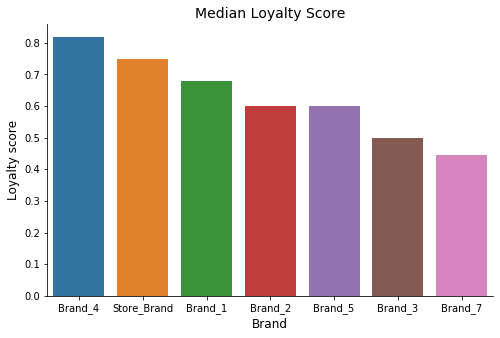

In [42]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='favorite_brand', y='median_loyalty', data=brands_loyalty)
plt.title('Median Loyalty Score', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
sns.despine()

In [43]:
# Наиболее высокая оценка лояльности у бренда 4

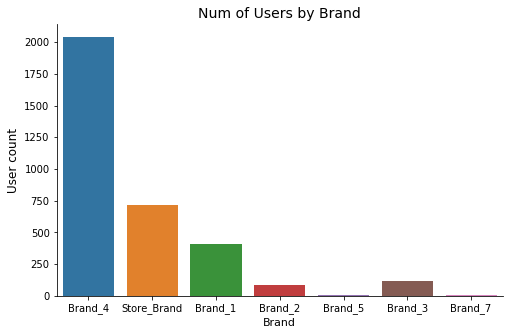

In [44]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='favorite_brand', y='user_count', data=brands_loyalty)
plt.title('Num of Users by Brand', fontsize=14)
plt.xlabel('Brand', fontsize=11)
plt.ylabel('User count', fontsize=12)
sns.despine()

In [45]:
# Большинство пользователей лояльны одному бренду, с наиболее высокой оценкой лояльности. У остальных брендов есть проблемы.